# **Titanic Survival Analysis: Exploring Patterns and Trends Through EDA**

### **Project Description:**
The goal of this project is to perform data cleaning and exploratory data analysis (EDA) on the Titanic dataset. By analyzing univariate, bivariate, and multivariate relationships, the aim is to explore patterns and trends related to survival rates and identify key insights into the factors affecting survival.

### **1. Import Libraries:**

Let's import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **2. Load Dataset**

In [2]:
# Load the Titanic dataset
titanic_df = pd.read_csv("train.csv")

#prints first few rows of the dataset
print(titanic_df.head()) 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### **3. Data Overview : Let's understand the data**


In [3]:
#Data Overview

print("Data Overview")
print(titanic_df.info())

#no of rows and column in dataset
print(titanic_df.shape)

#summary-statistics 
print(titanic_df.describe())

Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std  

**Initial Observations**
- we have 891 entries (Passengers) and 12 columns (attributes).
- Mean survival rate of passengers is nearly equal to 0.39.
- There are two types of variables categorical and continuous.
- Average age of the passengers travelling was 29.6.

### **4. Data Cleaning**
Now, I will handle missing values, drop unnecessary columns, and remove duplicates(if any) in the titanic dataset.

In [4]:
# Check for the missing values 
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Handle missing values in age 
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())

# Handle missing values in Embarked 
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])

# Handle missing values in Cabin
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("Unknown")

print(titanic_df.isna().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


In [6]:
# Check for duplicates 
duplicates  = titanic_df.duplicated()
print(duplicates.sum())

0


- there are no duplicates in our data.

### **4. Data Analysis**
#### **Univariate Analysis**

Let's analyze numerical and categorical variables individually:

##### **1. Survival rate Distrbution** 
Let's check the survival rate of the passengers through a bar chart. 

Survived
0    549
1    342
Name: count, dtype: int64

Survival Count:
Survived
Died        549
Survived    342
Name: count, dtype: int64

Survival Percentages:
Survived
Died        61.616162
Survived    38.383838
Name: count, dtype: float64


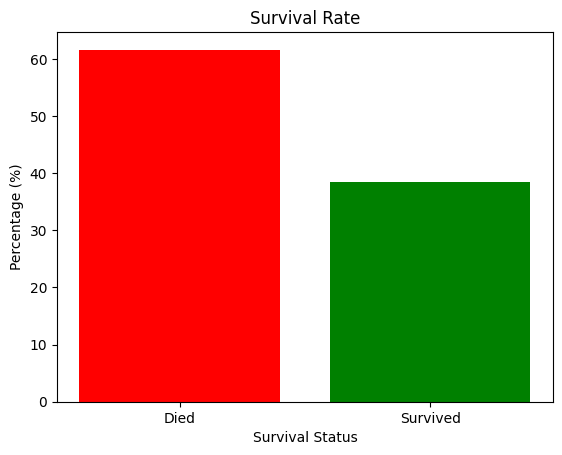

In [7]:
# survival count
survival_count = titanic_df['Survived'].value_counts()
print(survival_count)

# maping 0 to Died and 1 to Survived for clarity
survival_count.index = survival_count.index.map({0:'Died',1:'Survived'})
print("\nSurvival Count:")
print(survival_count)

# Calculating survival percentages
survival_percentage = (survival_count / survival_count.sum()) * 100
print("\nSurvival Percentages:")
print(survival_percentage)

#plotting bar chart
fig, ax = plt.subplots()
ax.bar(survival_percentage.index, survival_percentage.values, color=['red','green'])
ax.set_title('Survival Rate')
ax.set_xlabel('Survival Status')
ax.set_ylabel('Percentage (%)')
plt.show()


- We can see from the result that the survival rate is only **38.3 %** whereas **61.6 %** passengers died. This indicates that the majority of passengers perished, highlighting the tragedy's severity and the limited survival opportunities.

##### **2. Passenger Class Distribution**
Let's see how passengers are distributed across 1st, 2nd, and 3rd class.

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Passengers Count in each class: 
Pclass
1st Class    216
2nd Class    184
3rd Class    491
Name: count, dtype: int64


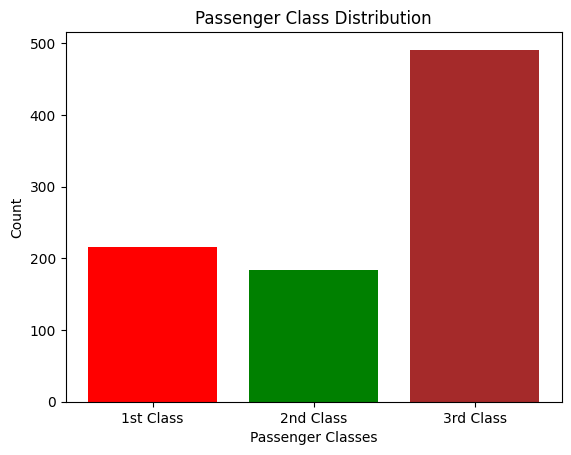

In [8]:
# Count of Passengers in each classes
Pclass_count = titanic_df['Pclass'].value_counts()
print(Pclass_count)

# Sorted the index in ascending order
Pclass_count_sorted = Pclass_count.sort_index()
print(Pclass_count_sorted)

# Rename the index values
Pclass_count_sorted.index = Pclass_count_sorted.index.map({1:"1st Class", 2:"2nd Class", 3:"3rd Class"})
print("\nPassengers Count in each class: ")
print(Pclass_count_sorted)

# Plotting Passenger Class Distribution
fig , ax = plt.subplots()
ax.bar(Pclass_count_sorted.index, Pclass_count_sorted.values, color = ['red','green','brown'])
ax.set_title("Passenger Class Distribution")
ax.set_ylabel("Count")
ax.set_xlabel("Passenger Classes")
plt.show()

- The 3rd Class had the most passengers **(491)**, followed by 1st Class **(216)** and 2nd Class **(184)**. This reflects the Titanic's role in carrying many lower-income travelers.
- The significant difference between classes could also explain survival disparities, as class played a key role in access to lifeboats and safety during the tragedy.

##### **3. Gender Distribution**
Now, Let's see how passengers are distributed according to the gender.


Gender Count
Sex
male      577
female    314
Name: count, dtype: int64


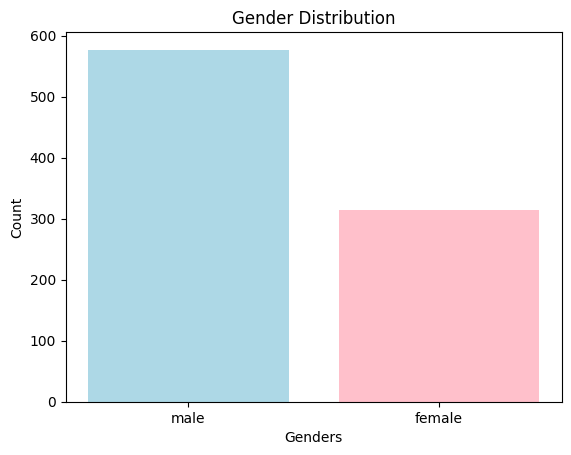

In [9]:
# count the passegers in each gender
gender_count = titanic_df['Sex'].value_counts()
print("\nGender Count")
print(gender_count)

# Plotting the gender distribution by creating bar plot
fig , ax= plt.subplots()
ax.bar(gender_count.index, gender_count.values, color = ['lightblue','pink'])
ax.set_title("Gender Distribution")
ax.set_ylabel("Count")
ax.set_xlabel("Genders")
plt.show()

- The plot shows that males **(577)** outnumbered females **(314)** on the Titanic. This indicates a significant gender imbalance, which may have influenced survival rates due to the "women and children first" policy during the evacuation.

##### **4. Age Distribution**
Let's visulaize the distribution of passengers according to the age.

Summary-statistics of Age Distribution
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


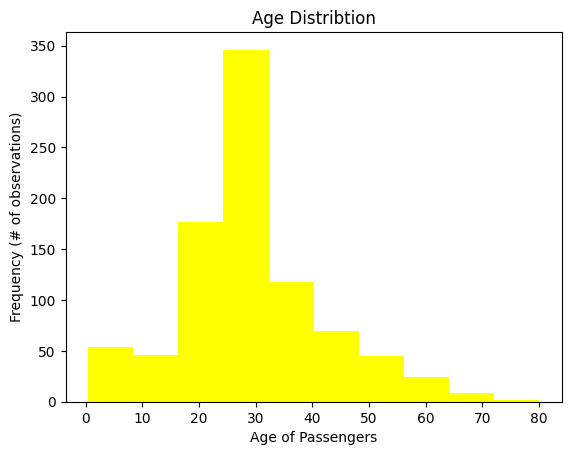

In [10]:
#summary statistics
print(f"Summary-statistics of Age Distribution")
print(titanic_df["Age"].describe())

# Plotting Age distribution 
fig, ax = plt.subplots()
ax.hist(titanic_df['Age'], bins = 10, color= "yellow")
ax.set_title("Age Distribtion")
ax.set_xlabel("Age of Passengers")
ax.set_ylabel("Frequency (# of observations)")
plt.show()

- The average age of Titanic passengers was **29.7 years**, with most between **22 and 35 years**, indicating most passengers were young to middle-aged adults. The youngest was **0.42 years** (infant), and the oldest was **80 years**.

#### **Bivariate Analysis**
Let's Analyze the relationship between variables identifying trends and patterns in data and see which factors affect the survival rate of passengers in titanic tragedy. 

##### **1. Survival Rate Analysis by gender**
Let's Analyze how gender affects the survival rate in titanic.


Gender Survival Percentages: 
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


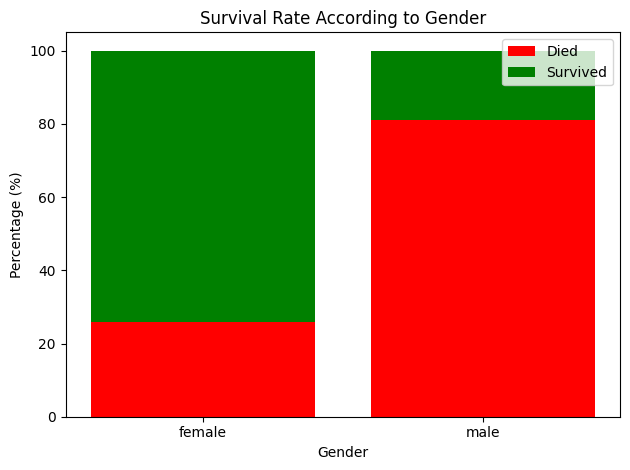

In [11]:
# Survival counts grouped by gender
gender_survival = titanic_df.groupby('Sex')['Survived'].value_counts().unstack()
gender_survival_percentage = gender_survival.div(gender_survival.sum(axis=1), axis=0) * 100
print("\nGender Survival Percentages: ")
print(gender_survival_percentage)

# Plotting using ax.bar
fig, ax = plt.subplots()
genders = gender_survival_percentage.index
died = gender_survival_percentage[0]
survived = gender_survival_percentage[1]

# Create stacked bars
ax.bar(genders, died, color='red', label='Died')
ax.bar(genders, survived, bottom=died, color='green', label='Survived')

# Customize plot
ax.set_title("Survival Rate According to Gender")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Gender")
ax.legend()

plt.tight_layout()
plt.show()


- We can see from the plot that **males** have relatively **lower survival rate (18.89%)** compared to **females** with **higher survival rate of(74.20%)**.
- This suggests that survival on the Titanic was influenced by gender, with females having a distinct advantage in terms of survival which aligns with the historical context of prioritizing women and children during evacuation efforts.

##### **2. Survival Rate Analysis by Passenger Class**

Let's Analyze how the Classes impact the survival Rate of Passengers


Class Survival Percentage:
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


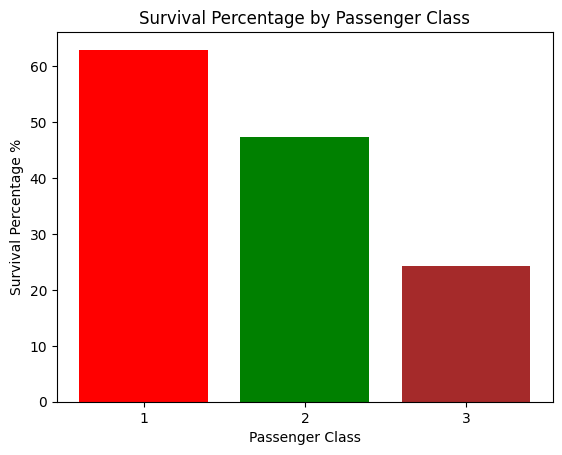

In [12]:
# Survival Counts grouped by Passenger class
class_survival = titanic_df.groupby('Pclass')['Survived'].value_counts().sort_index().unstack()
class_survival_percentage = class_survival.div(class_survival.sum(axis=1),axis=0) * 100
print("\nClass Survival Percentage:")
print(class_survival_percentage)

fig , ax = plt.subplots()
ax.bar(class_survival_percentage.index, class_survival_percentage[1], color = ["red","green","brown"])
ax.set_title('Survival Percentage by Passenger Class')
ax.set_ylabel('Survival Percentage %')
ax.set_xlabel('Passenger Class')
ax.set_xticks([1, 2, 3])
plt.show()

- This shows that **First Class Passengers** had the **highest survival rate of 62.96%**, **Second Class Passengers** had the **moderate survival rate of 47.28%** while the **Third Class Passengers** had the **lowest survival rate of 24.23%**.
- This shows a clear pattern where **wealthier passengers (first and second class) had better chances of survival**, likely due to their proximity to lifeboats, quicker access to safety, and the social dynamics at the time.

##### **3. Survival Rate by Age**
Let's Analyze the survival rate according to the Ages of Passengers.

Age Survival Percentage
Survived      0      1
Age                   
0.42        0.0  100.0
0.67        0.0  100.0
0.75        0.0  100.0
0.83        0.0  100.0
0.92        0.0  100.0
...         ...    ...
70.00     100.0    0.0
70.50     100.0    0.0
71.00     100.0    0.0
74.00     100.0    0.0
80.00       0.0  100.0

[89 rows x 2 columns]


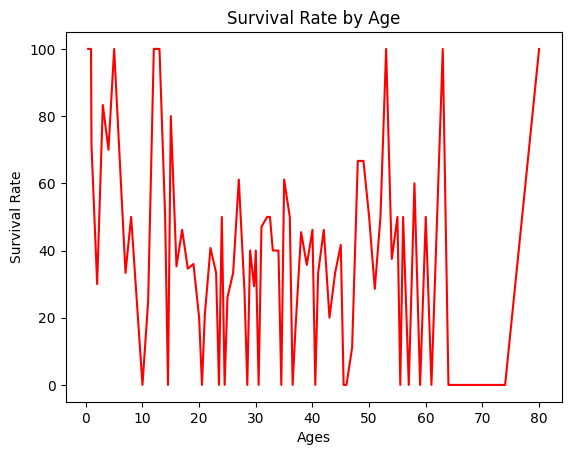

Summary-statistics
Survived           0           1
count      89.000000   89.000000
mean       60.822417   39.177583
std        32.071989   32.071989
min         0.000000    0.000000
25%        50.000000    0.000000
50%        62.500000   37.500000
75%       100.000000   50.000000
max       100.000000  100.000000


In [13]:
age_survival = titanic_df.groupby('Age')['Survived'].value_counts().unstack()
age_survival_percentage = age_survival.div(age_survival.sum(axis=1),axis=0) * 100

age_survival_percentage = age_survival_percentage.fillna(0)
print("Age Survival Percentage")
print(age_survival_percentage)

fig , ax = plt.subplots()
ax.plot(age_survival_percentage.index, age_survival_percentage[1], color = "r")
ax.set_title("Survival Rate by Age")
ax.set_xlabel("Ages")
ax.set_ylabel("Survival Rate")
plt.show()

print("Summary-statistics")
print(age_survival_percentage.describe())

- Infants **(ages <1)** had **100% survival**, likely due to the historic policy of prioritizing women and children first during evacuation.
- Middle-aged adults **(20-60)** show **highly volatile survival rates**, while elderly passengers **(70+)** exhibit **mixed outcomes**, possibly due to sparse data.
- Survival rates do not follow a smooth progression across ages, reflecting external factors like class, gender, and prioritization during evacuation.
- The summary statistics highlight a wide range in **survival rates (0-100%)** and indicate **uneven distribution across age groups**.

##### **4. Survival Rate by Fare**
Now, Let's analyze if the survival rate was affected by the fare price. 

Fare Survival Percentages
Survived           0           1
Fare                            
0.0000     93.333333    6.666667
4.0125    100.000000         NaN
5.0000    100.000000         NaN
6.2375    100.000000         NaN
6.4375    100.000000         NaN
...              ...         ...
227.5250   25.000000   75.000000
247.5208   50.000000   50.000000
262.3750         NaN  100.000000
263.0000   50.000000   50.000000
512.3292         NaN  100.000000

[248 rows x 2 columns]


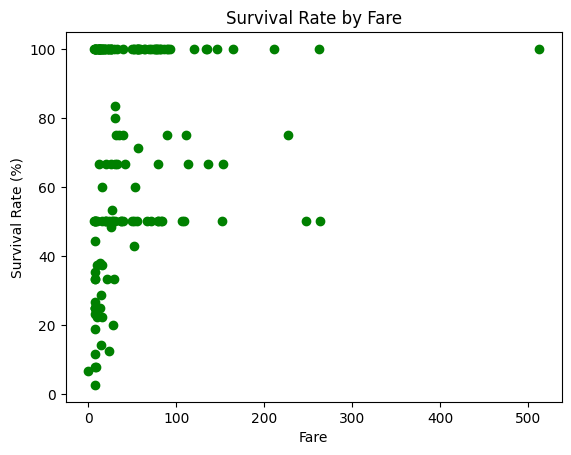

Summary Statistics
Survived           0           1
count     177.000000  153.000000
mean       78.436276   71.351498
std        26.645086   30.167132
min        16.666667    2.631579
25%        50.000000   50.000000
50%       100.000000   75.000000
75%       100.000000  100.000000
max       100.000000  100.000000


In [14]:
fare_survival = titanic_df.groupby("Fare")["Survived"].value_counts().unstack()
fare_survival_percentage = fare_survival.div(fare_survival.sum(axis=1),axis=0) * 100
print("Fare Survival Percentages")
print(fare_survival_percentage)

# Let's visualize the relationship by survival and fare using scatter plots
fig, ax = plt.subplots()
ax.scatter(fare_survival_percentage.index, fare_survival_percentage[1], color = "green")
ax.set_xlabel('Fare')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Fare')
plt.show()

#summary statisctics to understand better the relationship
print("Summary Statistics")
print(fare_survival_percentage.describe())

- **Higher Fares → Higher Survival:** Passengers paying higher fares **( >200)** had **higher survival rates**, reflecting priority for **1st-class** passengers.
- **Lower Fares → Lower Survival:** Passengers with low fares **(0-10)** had significantly **lower survival rates**.
- **Wide Variability:** Mid-range fares **(50-150)** show **mixed survival rates**, indicating other factors influenced outcomes.

#### **Multivariate Analysis**
Let's analyze the relationship between multiple variables and see how they affect the survival rate on titanic.

##### **1. Survival by Gender and Class**


Survival Rate by Gender and Class
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


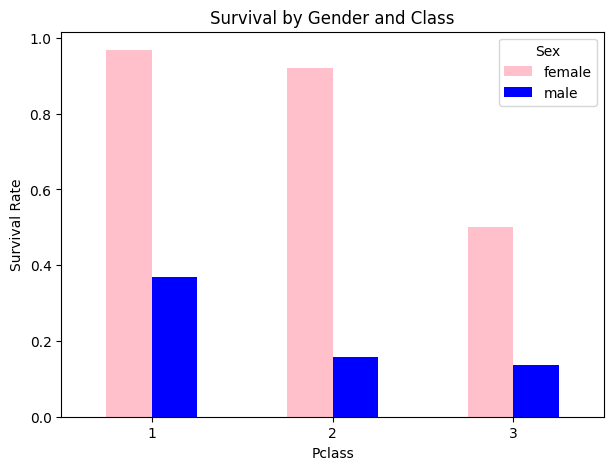

Summary statistics
Sex      female      male
count  3.000000  3.000000
mean   0.796379  0.220569
std    0.257747  0.128886
min    0.500000  0.135447
25%    0.710526  0.146427
50%    0.921053  0.157407
75%    0.944569  0.263130
max    0.968085  0.368852


In [15]:
# Gender and Class interaction with Survival
survival_gender_class = titanic_df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("\nSurvival Rate by Gender and Class")
print(survival_gender_class)

survival_gender_class.plot(kind='bar', figsize=(7, 5), color=['pink', 'blue'])
plt.title('Survival by Gender and Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 0)
plt.show()

print("Summary statistics")
print(survival_gender_class.describe())

- There is a clear **gender disparity in survival rates**, with **females having higher survival chances than males**.
- Class (Pclass) also plays a significant role, as **higher-class passengers (especially females) had better survival chances**, while lower-class passengers (especially males) had much poorer survival outcomes.
- The **"women and children first"** evacuation policy is likely a factor in the higher survival rates of females in the higher classes.

##### **2. Survival by Fare and Age**
Let's Analyze the survival rate by Fare and Age and check how it is affected due to these factors.

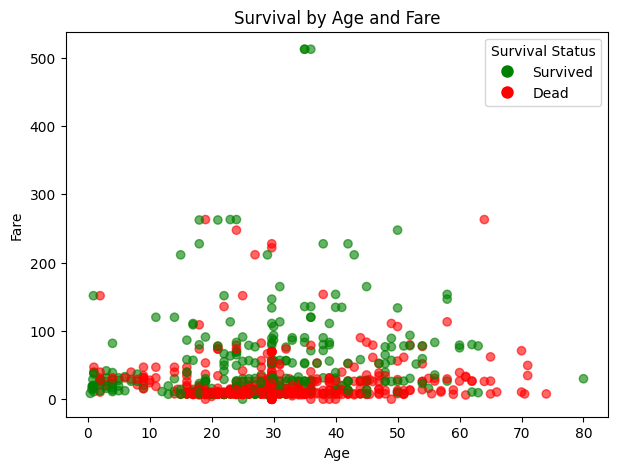

In [16]:
plt.figure(figsize=(7, 5))
colors = titanic_df['Survived'].map({0: 'red', 1: 'green'})
plt.scatter(titanic_df['Age'], titanic_df['Fare'], c=colors, alpha=0.6)
plt.title('Survival by Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Add legend
legend_labels = {'Survived': 'green', 'Dead': 'red'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ['green', 'red']]
plt.legend(handles=handles, labels=['Survived', 'Dead'], title="Survival Status")

plt.show()

- **Higher Fares Increase Survival:** Passengers who paid higher fares had better chances of survival, reflecting advantages for higher classes.
- **Age and Survival:** Younger passengers (children under 10) show better survival, aligning with prioritization of women and children.
- **Low Fares and Fatalities:** Passengers with low fares faced higher fatalities, highlighting disadvantages for lower classes.
- **Outliers:** Few high-fare outliers survived, reinforcing the fare-survival relationship.
- Fare strongly influences survival, while age has a weaker impact.

##### **3. Survival by Family size**
Now, Let's examine how family size affects survival:

Survival Rate by Family Size:
Survived             0          1
FamilySize                       
0            69.646182  30.353818
1            44.720497  55.279503
2            42.156863  57.843137
3            27.586207  72.413793
4            80.000000  20.000000
5            86.363636  13.636364
6            66.666667  33.333333
7           100.000000        NaN
10          100.000000        NaN


<Figure size 700x500 with 0 Axes>

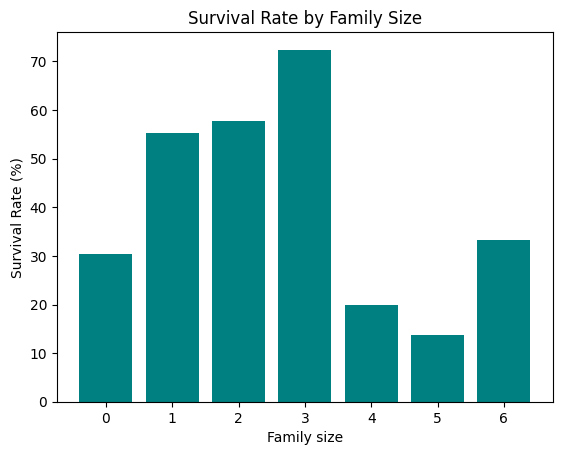

Summary statistics
Survived           0          1
count       9.000000   7.000000
mean       68.571117  40.408564
std        25.917786  21.732698
min        27.586207  13.636364
25%        44.720497  25.176909
50%        69.646182  33.333333
75%        86.363636  56.561320
max       100.000000  72.413793


In [17]:
# Creating a new feature for family size
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Relationship between Family Size and Survival
plt.figure(figsize=(7, 5))
family_survival = titanic_df.groupby('FamilySize')['Survived'].value_counts().unstack()
family_survival_percentage = family_survival.div(family_survival.sum(axis=1),axis=0) * 100
print("Survival Rate by Family Size:")
print(family_survival_percentage)

#Plotting
fig, ax = plt.subplots()
ax.bar(family_survival_percentage.index, family_survival_percentage[1], color = "teal")
ax.set_title("Survival Rate by Family Size")
ax.set_xlabel("Family size")
ax.set_ylabel("Survival Rate (%)")
plt.show()

#Summary-statistics
print("Summary statistics")
print(family_survival_percentage.describe())

- Passengers with small family sizes **(1-3 members)** had **higher survival rates**, with **family size 3** showing the **peak survival ~72%**.
- Survival rates **declined** for **larger families (≥4 members)** likely due to challenges in staying together during the chaos.
- Individuals traveling alone **(family size = 0)** also had **lower survival rates ~30%**.
- Very large families **(sizes 7 and above)** showed **minimal or no survival chances**.

##### **Correlation Analysis**

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.248512  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.091566   -0.248512  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000    0.217138  
FamilySiz

<Figure size 700x500 with 0 Axes>

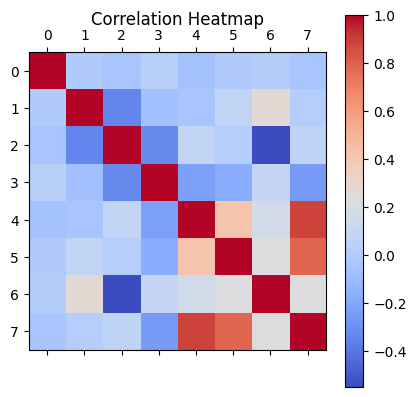

In [18]:
# Select only numeric columns for correlation calculation
numeric_df = titanic_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()
print(correlation)  # Print correlation matrix

# Plot heatmap
plt.figure(figsize=(7, 5))  # Set figure size
plt.matshow(correlation, cmap='coolwarm')  # Plot the matrix
plt.title('Correlation Heatmap', pad=20)
plt.colorbar()
plt.show()


**1. Survival Probability:**
Higher survival rates are associated with:

    - Higher Fare (wealthier passengers).
    - Higher Pclass (1st class passengers).

**2. Family Influence:**
Larger family size slightly affects survival but correlates strongly with SibSp and Parch.

**3. Feature Redundancy:**
FamilySize, SibSp, and Parch are closely related, so we can simplify by keeping one.

**4. Age Trends:**
Younger passengers tend to travel with family members.

#### **Conclusion:**
In this project, we explored the Titanic dataset to uncover patterns and relationships influencing passenger survival. Through univariate, bivariate, and multivariate analyses, as well as correlation analysis, we identified key factors such as gender, fare, and Pclass that significantly impacted survival rates. We also observed redundancies among family-related features (SibSp, Parch, and FamilySize) and noted higher survival tendencies among younger passengers traveling with family.

This analysis provides a solid foundation for survival prediction modeling and highlights the most influential features for further exploration.